In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
data_train = pd.read_csv('../input/nlp-getting-started/train.csv')
data_test = pd.read_csv('../input/nlp-getting-started/test.csv')
data_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
data_train = data_train.drop(['keyword', 'location'], axis=1)
data_test = data_test.drop(['keyword', 'location'], axis=1)

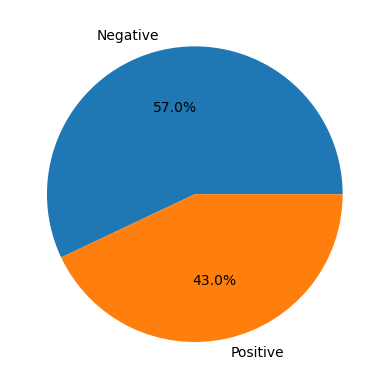

1.3274228064811984


In [4]:
import matplotlib.pyplot as plt

label_count = data_train['target'].value_counts()
labels = ['Negative', 'Positive']

plt.pie(label_count, labels=labels, autopct='%1.1f%%')

plt.show()

In [5]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

nltk.download('stopwords')

def clean_tweet(tweet):
    """
    Cleans a single tweet by removing URLs, mentions, hashtags, punctuations,
    numbers, and stopwords, and converting all characters to lowercase.
    """
    # Remove URLs
    tweet = re.sub(r"http\S+", "", tweet)

    # Remove mentions
    tweet = re.sub(r"@\w+", "", tweet)

    # Remove hashtags
    tweet = re.sub(r"#\w+", "", tweet)

    # Remove punctuations
    tweet = tweet.translate(str.maketrans("", "", string.punctuation))

    # Remove numbers
    tweet = re.sub(r"\d+", "", tweet)

    # Convert to lowercase
    tweet = tweet.lower()

    # Tokenize the tweet
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tokens = tokenizer.tokenize(tweet)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Join the filtered tokens back into a string
    cleaned_tweet = " ".join(filtered_tokens)

    return cleaned_tweet


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
data_train['cleaned_text'] = data_train['text'].apply(clean_tweet)
data_test['cleaned_text'] = data_test['text'].apply(clean_tweet)
data_train.head()

,id,text,target,cleaned_text
0,1,Our Deeds are the Reason of this #earthquake M...,1,deeds reason may allah forgive us
1,4,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,6,"13,000 people receive #wildfires evacuation or...",1,people receive evacuation orders california
4,7,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby smoke pours school


In [7]:
data_train = data_train[['cleaned_text','target']]
data_test = data_test[['cleaned_text']]

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
# Apply the Bag of Words technique to the cleaned tweets
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(data_train['cleaned_text']).toarray()

In [9]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Define the LSTM model architecture
model = Sequential()
model.add(LSTM(128, input_shape=(bow_matrix.shape[1], 1)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the BoW matrix and labels
model.fit(x=bow_matrix.reshape(bow_matrix.shape[0], bow_matrix.shape[1], 1),
          y=data_train['target'].values,
          batch_size=64,
          epochs=10,
          validation_split=0.2)

Epoch 1/10
96/96 [==============================] - 64s 581ms/step - loss: 0.6826 - accuracy: 0.5783 - val_loss: 0.6933 - val_accuracy: 0.5345
Epoch 2/10
96/96 [==============================] - 55s 572ms/step - loss: 0.6814 - accuracy: 0.5793 - val_loss: 0.6951 - val_accuracy: 0.5345
Epoch 3/10
96/96 [==============================] - 56s 584ms/step - loss: 0.6812 - accuracy: 0.5793 - val_loss: 0.6921 - val_accuracy: 0.5345
Epoch 4/10
96/96 [==============================] - 56s 589ms/step - loss: 0.6813 - accuracy: 0.5793 - val_loss: 0.6930 - val_accuracy: 0.5345
Epoch 5/10
96/96 [==============================] - 56s 580ms/step - loss: 0.6812 - accuracy: 0.5793 - val_loss: 0.6952 - val_accuracy: 0.5345
Epoch 6/10
96/96 [==============================] - 57s 592ms/step - loss: 0.6816 - accuracy: 0.5793 - val_loss: 0.6931 - val_accuracy: 0.5345
Epoch 7/10
96/96 [==============================] - 56s 583ms/step - loss: 0.6809 - accuracy: 0.5793 - val_loss: 0.6933 - val_accuracy: 0.5345

In [10]:
from keras.layers import GRU, Dense, Dropout

# Define the GRU model architecture
model = Sequential()
model.add(GRU(128, input_shape=(bow_matrix.shape[1], 1)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the BoW matrix and labels
model.fit(x=bow_matrix.reshape(bow_matrix.shape[0], bow_matrix.shape[1], 1),
          y=data_train['target'].values,
          batch_size=64,
          epochs=10,
          validation_split=0.2)

Epoch 1/10
96/96 [==============================] - 52s 517ms/step - loss: 0.6826 - accuracy: 0.5796 - val_loss: 0.6939 - val_accuracy: 0.5345
Epoch 2/10
96/96 [==============================] - 49s 515ms/step - loss: 0.6814 - accuracy: 0.5793 - val_loss: 0.6929 - val_accuracy: 0.5345
Epoch 3/10
96/96 [==============================] - 49s 513ms/step - loss: 0.6818 - accuracy: 0.5793 - val_loss: 0.6974 - val_accuracy: 0.5345
Epoch 4/10
96/96 [==============================] - 51s 529ms/step - loss: 0.6814 - accuracy: 0.5793 - val_loss: 0.6939 - val_accuracy: 0.5345
Epoch 5/10
96/96 [==============================] - 50s 520ms/step - loss: 0.6811 - accuracy: 0.5793 - val_loss: 0.6936 - val_accuracy: 0.5345
Epoch 6/10
96/96 [==============================] - 49s 512ms/step - loss: 0.6812 - accuracy: 0.5793 - val_loss: 0.7024 - val_accuracy: 0.5345
Epoch 7/10
96/96 [==============================] - 50s 519ms/step - loss: 0.6813 - accuracy: 0.5793 - val_loss: 0.6935 - val_accuracy: 0.5345